In [16]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from scipy.stats import skew, kurtosis, variation, entropy
from statsmodels.tsa.stattools import adfuller, acf, pacf


In [13]:
pkl_filename = "./Data/data_dict.pkl"

with open(pkl_filename, "rb") as f:
    data_dict = pickle.load(f)

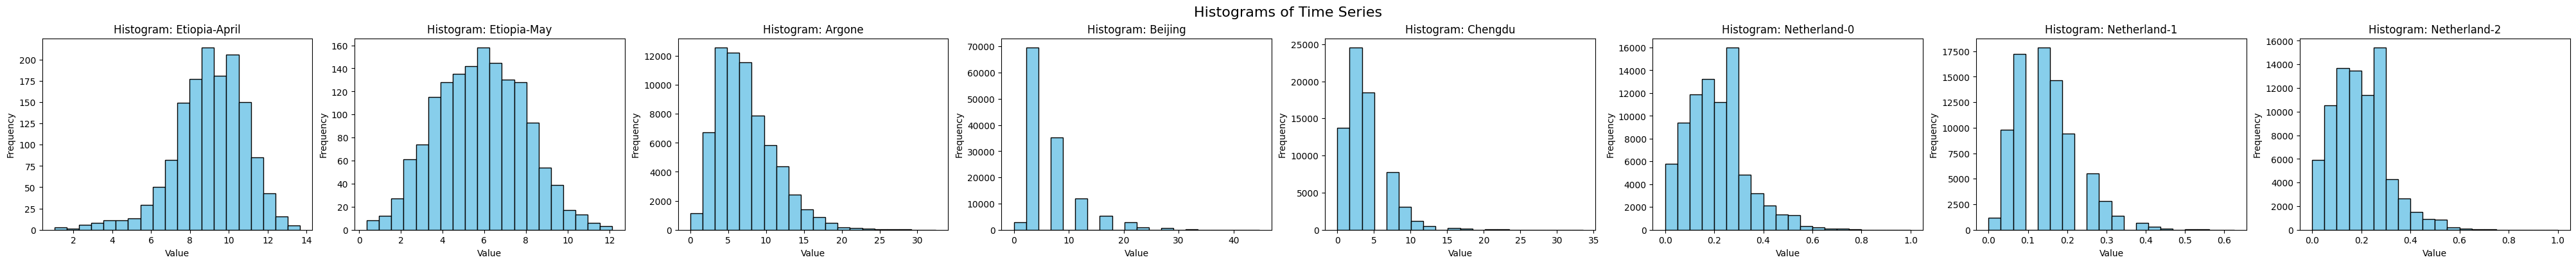

In [22]:
stats_list = []

# Number of datasets to analyze
datasets_to_analyze = list(data_dict.keys())[:-3]
num_datasets = len(datasets_to_analyze)

# Prepare histogram figure
fig, axes = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 4), constrained_layout=True)

for i, key in enumerate(datasets_to_analyze):
    dataset = pd.Series(data_dict[key]["time_series"])

    # Basic statistics
    mean_val = dataset.mean()
    std_val = dataset.std()
    min_val = dataset.min()
    max_val = dataset.max()
    coeff_var = variation(dataset)

    # Shape statistics
    skewness_val = skew(dataset)
    kurtosis_val = kurtosis(dataset)

    # Stationarity test
    adf_result = adfuller(dataset)
    adf_pvalue = adf_result[1]
    is_stationary = adf_pvalue < 0.05

    # Autocorrelation and partial autocorrelation (lag 1)
    acf_val = acf(dataset, nlags=1)[1]
    pacf_val = pacf(dataset, nlags=1)[1]

    # Entropy (based on histogram bins)
    hist, _ = np.histogram(dataset, bins=10, density=True)
    entropy_val = entropy(hist)

    # Count of sign changes (volatility)
    sign_changes = np.sum(np.diff(np.sign(dataset)) != 0)

    # Save stats
    stats = {
        'Dataset': key,
        'Mean': mean_val,
        'StdDev': std_val,
        'Min': min_val,
        'Max': max_val,
        'CoeffVar': coeff_var,
        'Skewness': skewness_val,
        'Kurtosis': kurtosis_val,
        'ACF_lag1': acf_val,
        'PACF_lag1': pacf_val,
        'ADF_pvalue': adf_pvalue,
        'IsStationary': is_stationary,
        'Entropy': entropy_val,
        'SignChanges': sign_changes
    }

    stats_list.append(stats)

    # Plot histogram
    axes[i].hist(dataset, bins=20, color='skyblue', edgecolor='black')
    # axes[i].set_title(f'Histogram: {key}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
plt.suptitle('Histograms of Time Series', fontsize=16)
plt.show()


In [23]:
# Create stats DataFrame
stats_df = pd.DataFrame(stats_list)
stats_df.head()

,Dataset,Mean,StdDev,Min,Max,CoeffVar,Skewness,Kurtosis,ACF_lag1,PACF_lag1,ADF_pvalue,IsStationary,Entropy,SignChanges
0,Etiopia-April,9.035193,1.830895,1.023438,13.665300,0.202570,-0.722158,1.252011,0.904659,0.905287,1.278893e-13,True,1.760825,0
1,Etiopia-May,5.813251,2.088985,0.373047,12.143000,0.359228,0.062041,-0.438776,0.874343,0.874931,1.924745e-11,True,1.994590,0
2,Argone,7.283815,3.830788,0.000000,32.440000,0.525928,1.049314,1.611678,0.936683,0.936697,0.000000e+00,True,1.539928,8
3,Beijing,6.485778,4.989101,0.000000,44.709999,0.769234,1.799331,3.957458,0.892971,0.892978,0.000000e+00,True,1.187243,4586
4,Chengdu,3.521459,2.958932,0.000000,33.530000,0.840251,1.419386,3.997341,0.701912,0.701922,0.000000e+00,True,1.102393,12305
